Please do one of the following.


# Part I: Classification

1) Load in the dataset `https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv` into a pandas dataframe

In [371]:
import pandas as pd
data = pd.read_csv('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv', index_col=0)
data.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


2) Convert `default` and `student` to categorical variables.

In [372]:
#convert default and student into categorical variables - use built-in one-hot encoding
data = pd.get_dummies(data, columns=["default", "student"])
data = data.drop('default_No', axis=1)
data = data.drop('student_No', axis=1)


data.head()

,balance,income,default_Yes,student_Yes
1,729.526495,44361.625074,0,0
2,817.180407,12106.134700,0,1
3,1073.549164,31767.138947,0,0
4,529.250605,35704.493935,0,0
5,785.655883,38463.495879,0,0


3) Make boxplots of all of the variables and a scatter plot of of (balance,income) with the color
of the outcome of `default` labeled red if yes and blue if no. 

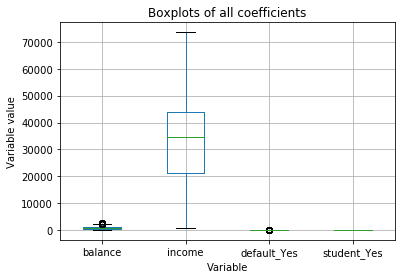

In [373]:
#make boxplots of all variables
import matplotlib.pyplot as plt
data.boxplot()
plt.title('Boxplots of all coefficients')
plt.xlabel('Variable')
plt.ylabel('Variable value')
plt.show()

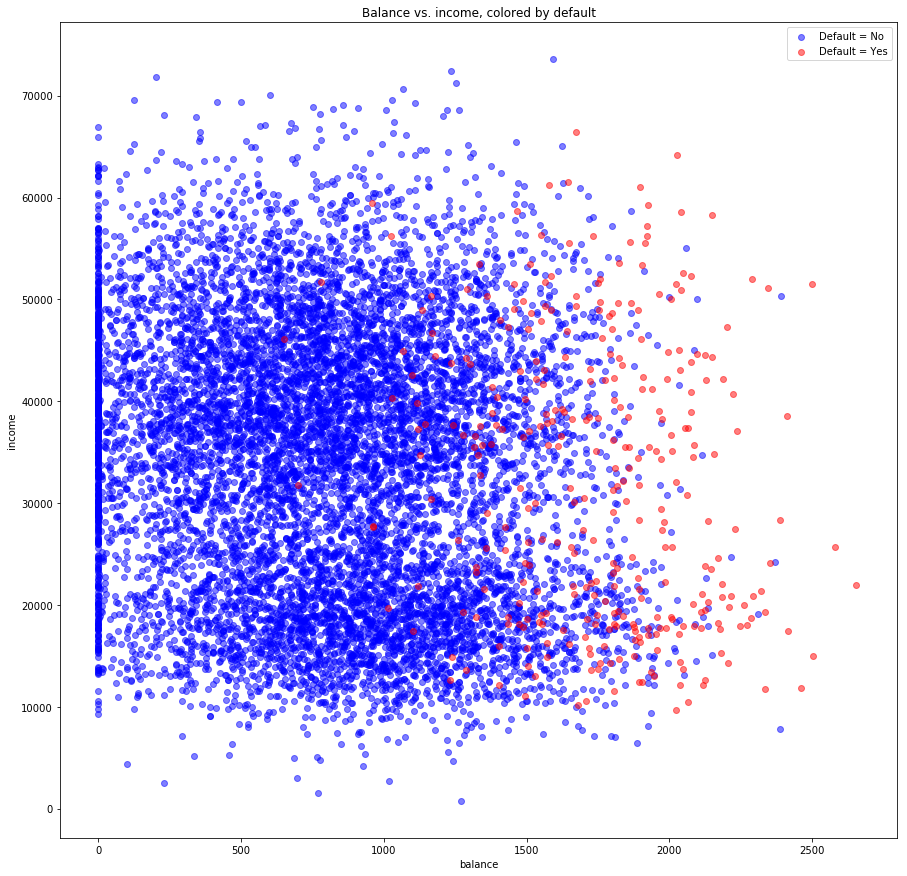

In [374]:
#make scatter plot of (balance, income) with color of point labeled red if default is yes, blue if no
default_yes_data = data[data['default_Yes']==1]
default_no_data = data[data['default_Yes']==0]

plt.figure(figsize = (15,15))
plt.scatter(default_no_data['balance'], default_no_data['income'], color='blue', alpha = 0.5, label='Default = No')
plt.scatter(default_yes_data['balance'], default_yes_data['income'], color='red', alpha=0.5, label='Default = Yes')

plt.xlabel('balance')
plt.ylabel('income')
plt.title('Balance vs. income, colored by default')
plt.legend()
plt.show()

4) Train a model to predict if a student defaults on their loan or not using LogisticRegression based soley
on the `balance` and `income` variables. Plot the decision boundary in the scatter plot you made in 3) and compute the AUC ROC.

In [375]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#only student data
student_data = data[data['student_Yes']==1]

X = student_data[['balance', 'income']]
y = student_data['default_Yes']

#use train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=7)

#train model
regr = LogisticRegression(penalty='l1')
regr.fit(X_train, y_train)

#make predictions on testing
predictions_test = regr.predict(X_test)

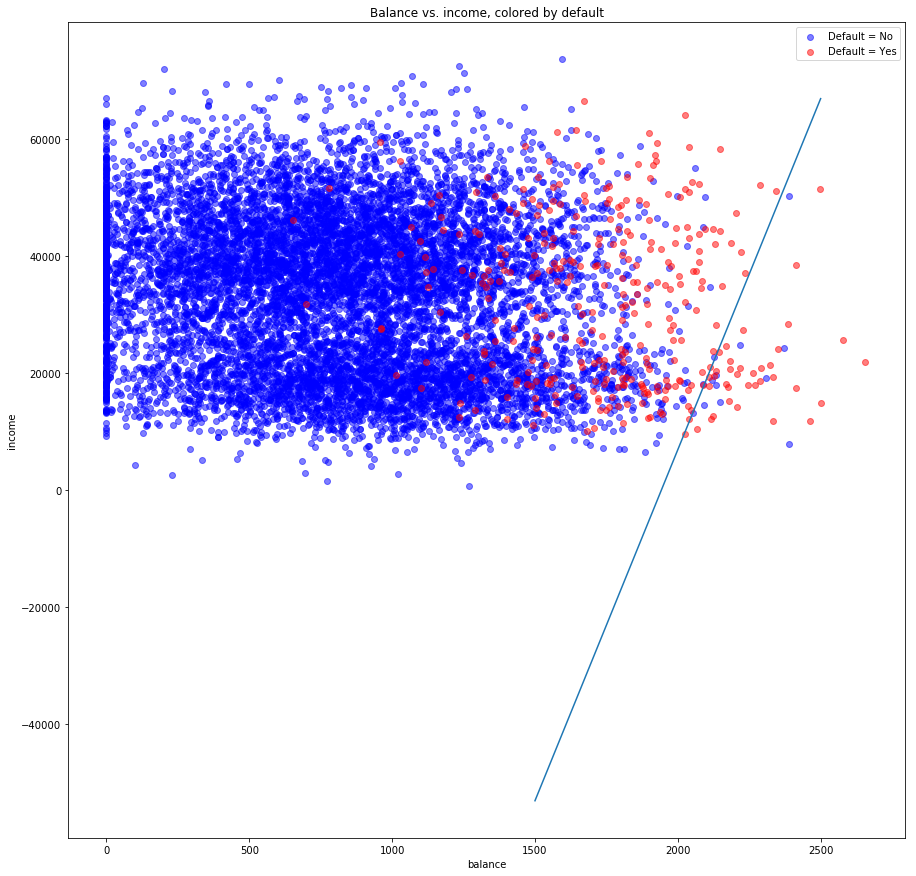

In [376]:
#plot decision boundary - specify line
w = regr.coef_[0]
slope = - w[0]/w[1]
intercept = (regr.intercept_[0])/w[1]

x_points = np.linspace(1500, 2500, 2000)
y_points = slope*x_points - intercept

#make scatter plot of (balance, income) with color of point labeled red if default is yes, blue if no
default_yes_data = data[data['default_Yes']==1]
default_no_data = data[data['default_Yes']==0]

plt.figure(figsize = (15,15))
plt.scatter(default_no_data['balance'], default_no_data['income'], color='blue', alpha = 0.5, label='Default = No')
plt.scatter(default_yes_data['balance'], default_yes_data['income'], color='red', alpha=0.5, label='Default = Yes')
plt.plot(x_points, y_points)

plt.xlabel('balance')
plt.ylabel('income')
plt.title('Balance vs. income, colored by default')
plt.legend()
plt.show()

Area under the ROC curve : 0.943230


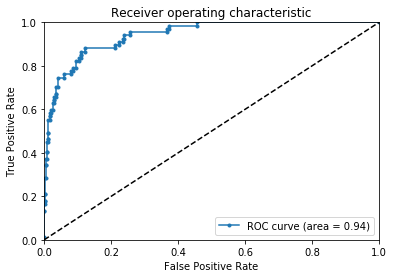

In [377]:
#compute AUC ROC
import sklearn.metrics
from sklearn.metrics import roc_curve, auc

#this is another way to cmopute ROC AUC
sklearn.metrics.roc_auc_score(y_test, predictions_test)

# Computes the AUC ROC of the classifier.
def generate_auc(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=7)
    
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve : %f" % roc_auc)
    return fpr, tpr, roc_auc, thresholds

# Generate ROC  for LR with l1 penalty
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression,penalty='l1')

def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

5) Repeat 4) but with the student variable included. Optimize using Ridge regression and plot the ranking
of coefficients.  How does performance improve with the added variable?

In [378]:
X = data[['balance', 'income', 'student_Yes']]
y = data['default_Yes']

#use train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=7)

#train model 
regr = LogisticRegression(penalty='l1')
regr.fit(X_train, y_train)

#make predictions on testing
predictions_test = regr.predict(X_test)

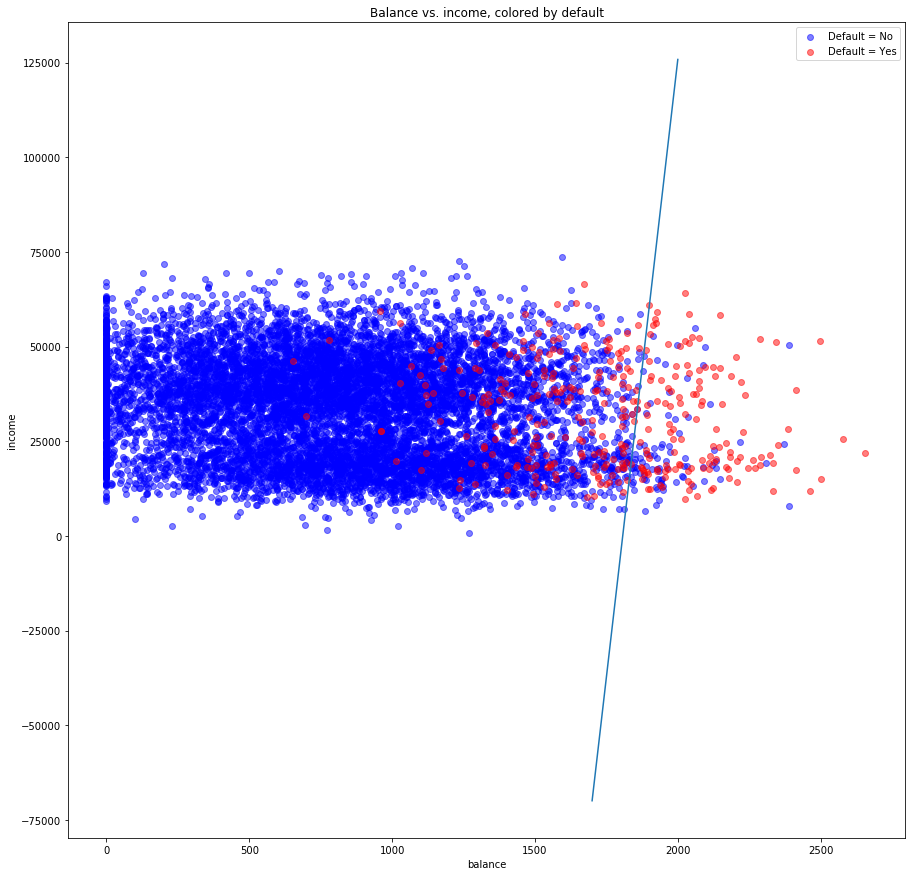

In [379]:
#plot decision boundary - specify line
w = regr.coef_[0]
slope = - w[0]/w[1]
intercept = (regr.intercept_[0])/w[1]

x_points = np.linspace(1700, 2000, 2000)
y_points = slope*x_points - intercept

#make scatter plot of (balance, income) with color of point labeled red if default is yes, blue if no
default_yes_data = data[data['default_Yes']==1]
default_no_data = data[data['default_Yes']==0]

plt.figure(figsize = (15,15))
plt.scatter(default_no_data['balance'], default_no_data['income'], color='blue', alpha = 0.5, label='Default = No')
plt.scatter(default_yes_data['balance'], default_yes_data['income'], color='red', alpha=0.5, label='Default = Yes')
plt.plot(x_points, y_points)

plt.xlabel('balance')
plt.ylabel('income')
plt.title('Balance vs. income, colored by default')
plt.legend()
plt.show()

Area under the ROC curve : 0.946170


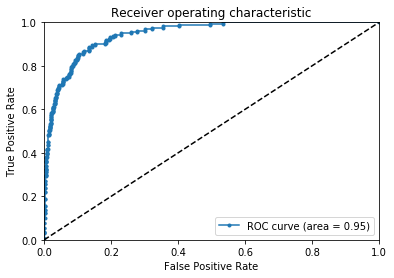

In [380]:
#compute AUC ROC
import sklearn.metrics
from sklearn.metrics import roc_curve, auc

#another way to compute ROC AUC
sklearn.metrics.roc_auc_score(y_test, predictions_test)

# Generate ROC  for LR with l1 penalty
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression,penalty='l1')

# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

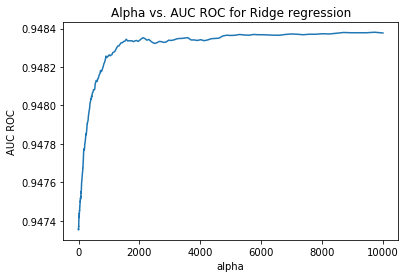

9727.2031924505573

In [439]:
#optimize using ridge regression - alternate method based on AUC ROC 
from sklearn.linear_model import Ridge

alphas = np.logspace(-8,4,1000)

scores = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=7)

for alpha in alphas:

    regr = Ridge(alpha = alpha)

    regr.fit(X_train, y_train)
    
    y_pred = regr.predict(X_test)
    
    #compute AUC ROC for particular alpha (for ridge)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    scores.append(roc_auc)
    
plt.plot(alphas, scores)
plt.xlabel('alpha')
plt.ylabel('AUC ROC')
plt.title('Alpha vs. AUC ROC for Ridge regression')
plt.show()

alpha_best = alphas[scores.index(max(scores))]
alpha_best

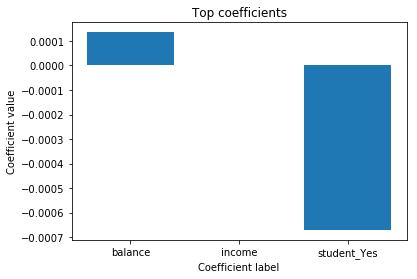

array([  1.34790423e-04,   5.52023562e-07,  -6.70623066e-04])

In [440]:
#compute coefficients
regr = Ridge(alpha=alpha_best)
regr.fit(X_train,y_train)
coeffs = np.array(regr.coef_)

#plot coefficients
plt.bar(np.array([0,1,2]), coeffs)
plt.xlabel('Coefficient label')
plt.ylabel('Coefficient value')
plt.xticks(np.array([0,1,2]), X.columns.values)
plt.title('Top coefficients')
plt.show()
coeffs

We see that performance does not change drastically with the addition of a new variable (our AUC ROC remains around 0.95). Below we've also tested some alternate methods for regularization. 

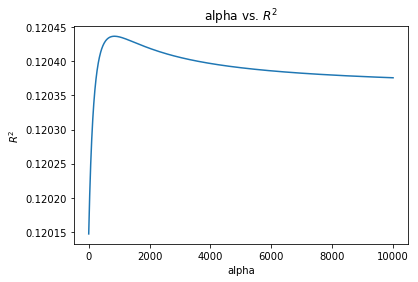

852.96444997410163

In [446]:
#alternate method - ridge regression based on R^2 (instead of AUC ROC)
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#set a range of alphas
alphas = np.logspace(-8,4,1000)
scores = []

#split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=7)

#iterate through alpha values and compute R^2, then plot; pick optimal alpha
for alpha in alphas:
    regr = Ridge(alpha=alpha)
    
    #train the model using training data and record the score
    regr.fit(X_train, y_train)
    
    #record score
    scores.append(regr.score(X_test, y_test))

#plot alphas vs. scores
plt.plot(alphas, scores)
plt.xlabel('alpha')
plt.ylabel('$R^2$')
plt.title('alpha vs. $R^2$')
plt.show()

alpha_best_R_sq = alphas[scores.index(max(scores))]
alpha_best_R_sq

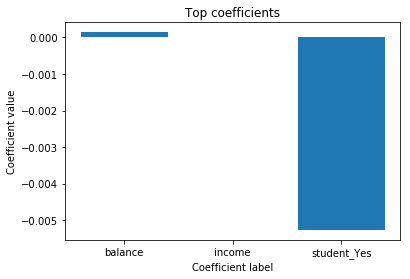

array([  1.35170045e-04,   4.35214108e-07,  -5.26394387e-03])

In [447]:
#plot coefficients
regr = Ridge(alpha=alpha_best_R_sq)
regr.fit(X_train,y_train)
coeffs = np.array(regr.coef_)

#sort and plot coefficients
#coeffs = np.sort(coeffs)
plt.bar(np.array([0,1,2]), coeffs)
plt.xlabel('Coefficient label')
plt.xticks(np.array([0,1,2]), X.columns.values)
plt.ylabel('Coefficient value')
plt.title('Top coefficients')
plt.show()
coeffs

In [448]:
#a different way to optimize using ridge regression - incorporate L2 penalty into logistic regression
from sklearn.linear_model import Ridge

C_vals = np.logspace(-10,4,1000)

scores = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=7)


for C in C_vals:
    
    #change penalty to l2 - ridge regression
    regr = LogisticRegression(penalty='l2', C = C)
    regr.fit(X_train, y_train)
    
    y_pred = regr.predict(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    scores.append(roc_auc)
    
C_best = C_vals[scores.index(max(scores))]
C_best

1e-10

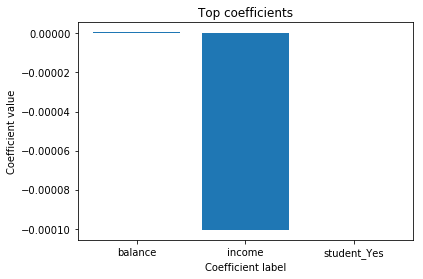

array([[  4.94334755e-07,  -1.00608910e-04,  -1.57639344e-08]])

In [449]:
#compute coefficients
regr = LogisticRegression(penalty = 'l2', C=C_best)
regr.fit(X_train,y_train)
coeffs = np.array(regr.coef_)

#sort and plot coefficients
#coeffs = np.sort(coeffs)
plt.bar(np.array([0,1,2]), coeffs[0])
plt.xlabel('Coefficient label')
plt.xticks(np.array([0,1,2]), X.columns.values)
plt.ylabel('Coefficient value')
plt.title('Top coefficients')
plt.show()
coeffs

6) Using cross validation, check that the model you built in 5) is robust (generalizes to other random folds of the dataset).

Area under the ROC curve : 0.979286


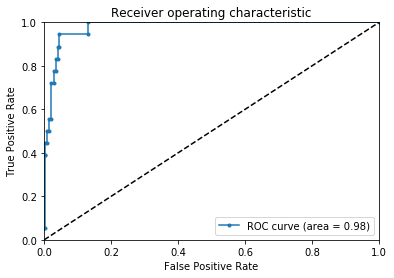

Area under the ROC curve : 0.947368


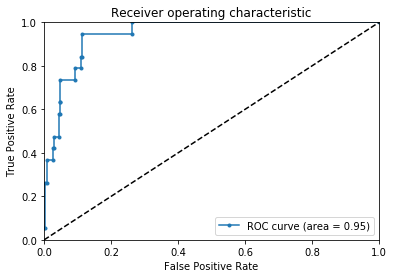

Area under the ROC curve : 0.893943


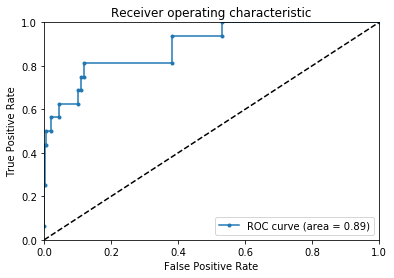

Area under the ROC curve : 0.938150


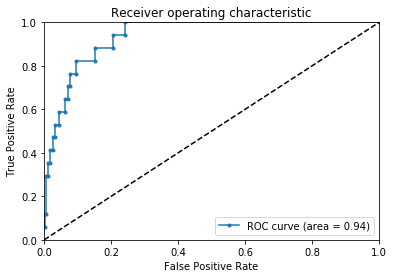

Area under the ROC curve : 0.974672


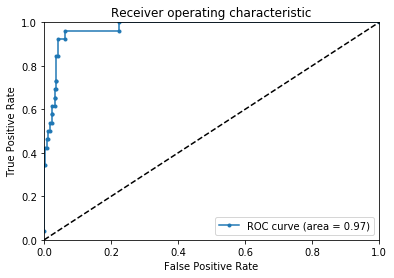

In [450]:
from sklearn.utils import shuffle

#shuffle data
X, y = shuffle(X, y, random_state=7)

#split into 5 random subsets (5 folds)
for n in range(5):
    n_samples, n_features = X.shape
    size_fifth = int(n_samples/5)
    size_train = int(0.7*size_fifth)
    
    X_subset = X[size_fifth*n: size_fifth*(n+1)]
    y_subset = y[size_fifth*n: size_fifth*(n+1)]
    
    X_train_subset, X_test_subset = X_subset[:size_train], X_subset[size_train:]
    y_train_subset, y_test_subset = y_subset[:size_train], y_subset[size_train:]
    
    #X_train, X_test = X[:size_fifth], X[size_fifth:]
    #y_train, y_test = y[:size_fifth], y[size_fifth:]

    classifier = Ridge(alpha=alpha_best)
    regr = classifier.fit(X_train_subset, y_train_subset)
    y_pred = regr.predict(X_test_subset)
    
    fpr, tpr, thresholds = roc_curve(y_test_subset, y_pred)
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % roc_auc)
    generate_ROCplot(fpr,tpr,'LR',roc_auc)

We see that our model generalizes well to random subsets of the data - on five random subsets, we still have an AUC ROC of >0.9. 

7) Train a Decision Tree classifier with maximum depth 5 and plot the decision tree. How does performance compare?

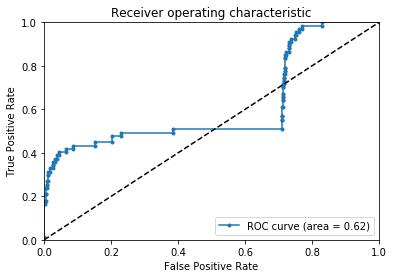

In [387]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import subprocess
import pandas as pd
import numpy as np
from PIL import Image, ImageFilter
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import display, Image

X = data[['balance', 'income', 'student_Yes']]
y = data['default_Yes']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=7)

# Fit regression model
regr_0 = DecisionTreeClassifier(max_depth=5)
regr_0.fit(X_train, y_train)

y_pred = regr.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
generate_ROCplot(fpr,tpr,'LR',roc_auc)

We see that our performance is worse than our models above - our AUC ROC is about 0.6-0.7.

In [403]:
#plot the tree

def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

from __future__ import print_function

import os
import subprocess

from sklearn.tree import DecisionTreeClassifier, export_graphviz
dt=DecisionTreeRegressor(max_depth=5)
visualize_tree(regr_0, feature_names=X.columns.values)

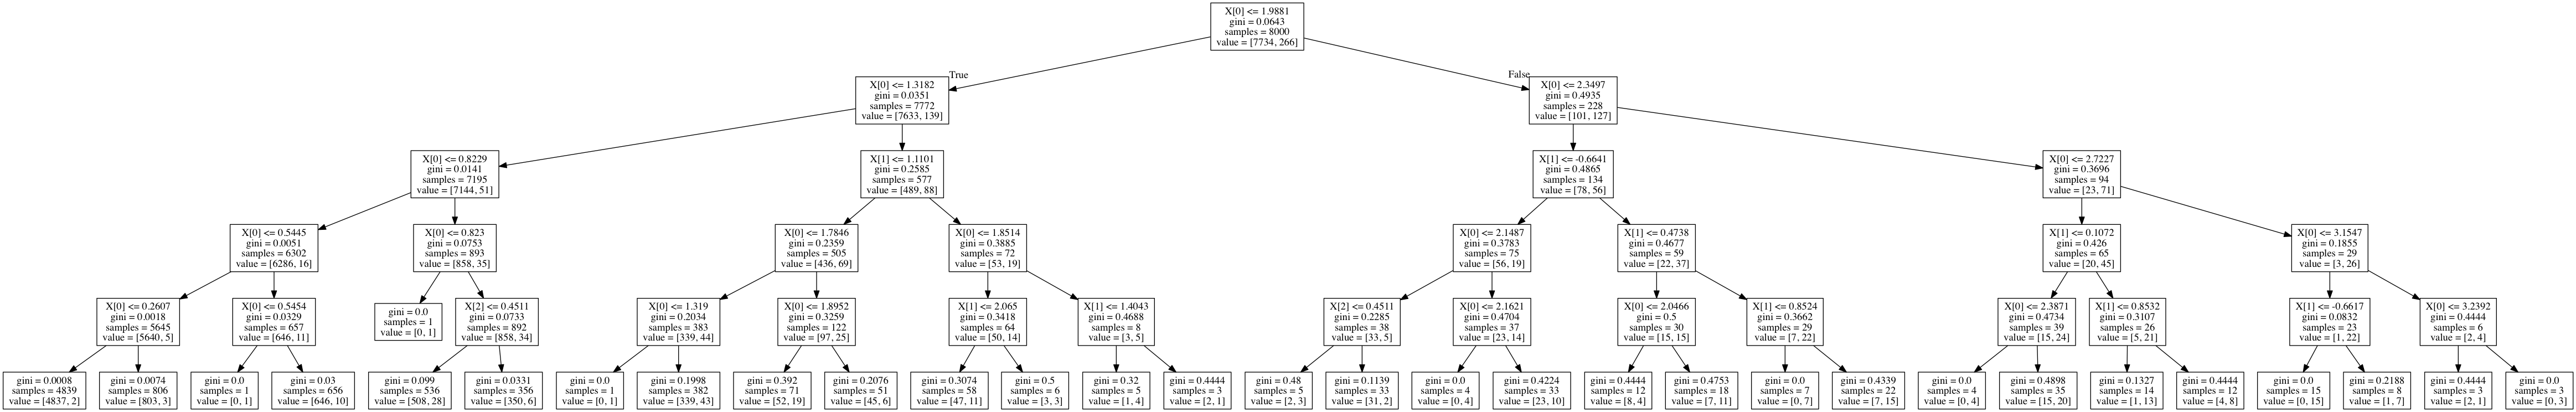

In [404]:
from IPython.display import Image  
dot_data=export_graphviz(regr_0, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

8) Find the optimal decision tree depth and compute the AUC ROC. 

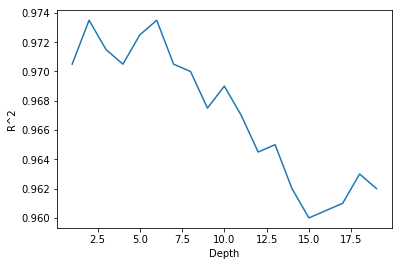

Optimal depth: 2


In [405]:
#check for different tree depths 
train_errors=[]
test_errors=[]
scores=[]
auc_rocs = []

depths = range(1,20)
for n in depths:
    regr = DecisionTreeClassifier(max_depth=n)
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    train_errors.append(regr.score(X_train,y_train))
    scores.append(regr.score(X_test,y_test))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    auc_rocs.append(roc_auc)
    
plt.ylabel('R^2')
plt.xlabel('Depth')
plt.plot(depths,scores)
plt.show()

test_errors=scores
n_opt=depths[np.argmax(scores)]

print('Optimal depth: ' + str(n_opt))

Area under the ROC curve : 0.873768


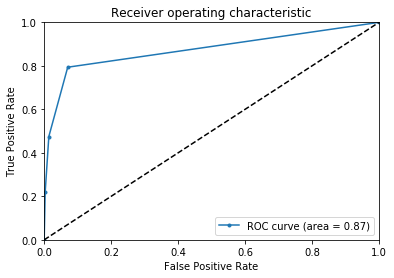

In [406]:
#compute AUC ROC
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,DecisionTreeClassifier,max_depth=n_opt)
generate_ROCplot(fpr,tpr,'LR',roc_auc)

# Part II: Recommendation Systems. 

In this problem we will use the notebook https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/matrix_factorization_recommender.ipynb  as
a starting point.

1) Split the ratings matrix `R_df` into training and testing sets. Remember we need to do this for rows and columns now. 

2) Evaluate the performance of the matrix factorization model for $K=50$. In particular, measure the:
 - Precision.
 - Recall. 

You can round up or down to the nearest integer for the ratings. 

3) Construct an item/item and user/user model, and evaluate the performance as in 2). How does it compare?

4) Check how your answer to 3) changes (if at all) as you try different values of K for K=10, 20, 100. 

## 1) Read in data and construct ratings matrix

In [4]:
#set up ratings matrix 
import pandas as pd
import numpy as np

ratings_list = [i.strip().split("::") for i in open('ratings.dat', 'r').readlines()]
users_list = [i.strip().split("::") for i in open('users.dat', 'r').readlines()]
movies_list = [i.strip().split("::") for i in open('movies.dat', 'r').readlines()]

In [5]:
ratings = np.array(ratings_list)
users = np.array(users_list)
movies = np.array(movies_list)

In [6]:
ratings_df = pd.DataFrame(ratings_list, columns = ['UserID', 'MovieID', 'Rating', 'Timestamp'], dtype = int)
movies_df = pd.DataFrame(movies_list, columns = ['MovieID', 'Title', 'Genres'])
movies_df['MovieID'] = movies_df['MovieID'].apply(pd.to_numeric)

In [7]:
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [9]:
R_df = ratings_df.pivot(index = 'UserID', columns ='MovieID', values = 'Rating').fillna(0)
R_df.head()

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#normalize by each user's ratings - need this??
R = R_df.as_matrix()
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

In [12]:
R_df

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
